In [ ]:
## Codes are adapted from "https://github.com/yunjey/pytorch-tutorial"

# 새 섹션

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
cd'/content/drive/My Drive/ColabNotebooks/Lecture/DeepLearning/Codes'

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

# torch version
print(torch.__version__)

1.8.1+cu101


In [ ]:
# Toy dataset
print("==== 2. Toy dataset ====")
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

==== 2. Toy dataset ====


In [ ]:
# our model for the forward pass
def forward(x): 
    return x * w

In [ ]:
# Loss function
def loss(x, y):
    y_pred = forward(x) # w*x
    return (y_pred - y) * (y_pred - y) # (wx-y)^2

In [ ]:
w_list = []
mse_list = []

for w in np.arange(0.0, 10.1, 0.1):
    # 기울기를 변화하면서 기울기 최적값 찾기.
    print("w=", w)
    l_sum = 0
    for x_val, y_val in zip(x_train, y_train):
        y_pred_val = forward(x_val)
        l = loss(x_val, y_val) # 평균 제곱 오차(mean square error)
        l_sum += l
        print("\t", x_val, y_val, y_pred_val, l)
    print("MSE=", l_sum / 3)
    w_list.append(w)
    mse_list.append(l_sum / 3)

w= 0.0
	 [3.3] [1.7] [0.] [2.89]
	 [4.4] [2.76] [0.] [7.6176]
	 [5.5] [2.09] [0.] [4.3680997]
	 [6.71] [3.19] [0.] [10.176101]
	 [6.93] [1.694] [0.] [2.869636]
	 [4.168] [1.573] [0.] [2.4743288]
	 [9.779] [3.366] [0.] [11.329955]
	 [6.182] [2.596] [0.] [6.739216]
	 [7.59] [2.53] [0.] [6.4009]
	 [2.167] [1.221] [0.] [1.4908409]
	 [7.042] [2.827] [0.] [7.9919286]
	 [10.791] [3.465] [0.] [12.006225]
	 [5.313] [1.65] [0.] [2.7224998]
	 [7.997] [2.904] [0.] [8.433216]
	 [3.1] [1.3] [0.] [1.6899998]
MSE= [29.733515]
w= 0.1
	 [3.3] [1.7] [0.33] [1.8769]
	 [4.4] [2.76] [0.44000003] [5.3823996]
	 [5.5] [2.09] [0.55] [2.3716]
	 [6.71] [3.19] [0.671] [6.345361]
	 [6.93] [1.694] [0.693] [1.0020008]
	 [4.168] [1.573] [0.41680002] [1.3367983]
	 [9.779] [3.366] [0.9779] [5.703021]
	 [6.182] [2.596] [0.6182] [3.9116924]
	 [7.59] [2.53] [0.759] [3.1364408]
	 [2.167] [1.221] [0.2167] [1.0086185]
	 [7.042] [2.827] [0.70419997] [4.5062795]
	 [10.791] [3.465] [1.0791] [5.6925187]
	 [5.313] [1.65] [0.5313] 

In [ ]:
min = np.min(mse_list)
ans = 0
for index, n in enumerate(mse_list):
    if n == min:
        ans = w_list[index]
        break

In [ ]:
print('w =',ans,'mse =', min)

w = 0.4 mse = 1.4397178


In [ ]:
w = ans
print("w = ",ans)
l_sum = 0
for x_val, y_val in zip(x_train, y_train):
    y_pred_val = forward(x_val)
    l = loss(x_val, y_val)
    l_sum += l
    print("\t", x_val, y_val, y_pred_val, l)
print("MSE=", l_sum / 3)
a = ans
b = np.mean(y_train)-(np.mean(x_train)*ans)
print("a = {0}, b = {1}".format(a,b))
print("y = {0}x + {1}".format(a,b))

w =  0.4
	 [3.3] [1.7] [1.32] [0.1444]
	 [4.4] [2.76] [1.7600001] [0.99999976]
	 [5.5] [2.09] [2.2] [0.01210003]
	 [6.71] [3.19] [2.684] [0.25603604]
	 [6.93] [1.694] [2.772] [1.1620841]
	 [4.168] [1.573] [1.6672001] [0.00887367]
	 [9.779] [3.366] [3.9116] [0.29767954]
	 [6.182] [2.596] [2.4728] [0.01517823]
	 [7.59] [2.53] [3.036] [0.25603604]
	 [2.167] [1.221] [0.8668] [0.1254576]
	 [7.042] [2.827] [2.8167999] [0.00010404]
	 [10.791] [3.465] [4.3164] [0.7248822]
	 [5.313] [1.65] [2.1252] [0.22581509]
	 [7.997] [2.904] [3.1988] [0.08690707]
	 [3.1] [1.3] [1.24] [0.00359999]
MSE= [1.4397178]
a = 0.4, b = -0.10144000053405788
y = 0.4x + -0.10144000053405788


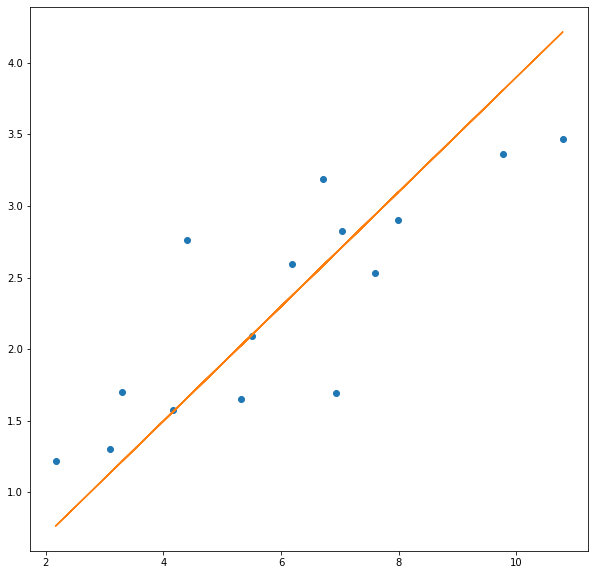

In [ ]:
# 앞서 구한 기울기와 절편을 이용해 그래프를 그려 봅니다.
y_pred = ans * x_train + np.mean(y_train)-(np.mean(x_train)*ans)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.figure(figsize=(10,10))
plt.scatter(x_train, y_train)
plt.plot(x_train,y_pred,color=colors[1])
plt.show()

최소제곱법 해보기

x_train

y_train

y = ax + b

a = (x - x.mean)*(y - y.mean)합/(x - x.mean)**2 의 합 

In [ ]:
x_pred = x_train - np.mean(x_train)
y_pred = y_train - np.mean(y_train)
x_a = np.sum(x_pred)
y_a = np.sum(y_pred)
print(x_a**2)
print(x_a*y_a)
mls_a = (x_a*y_a)/(x_a**2)
print(mls_a)
mls_b = np.mean(y_train) - (np.mean(x_train)*mls_a)
print(mls_b)
print("a = {0}, b = {1}".format(mls_a,mls_b))
print("y = {0}x + {1}".format(mls_a,mls_b))

3.552713678800501e-11
1.9184654e-11
0.54
-0.9504840660095217
a = 0.54, b = -0.9504840660095217
y = 0.54x + -0.9504840660095217


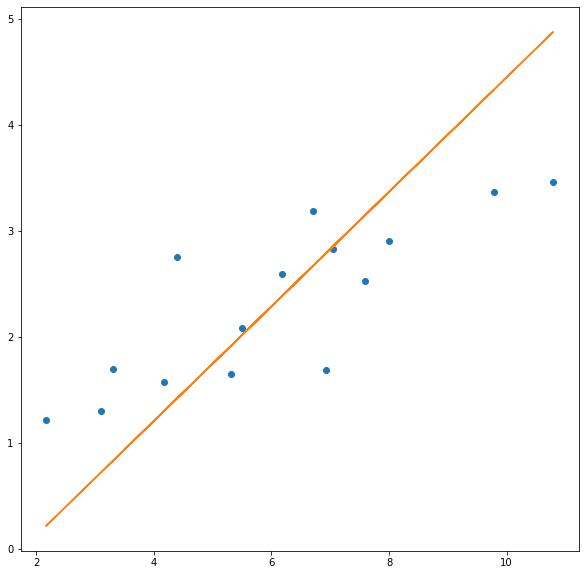

In [ ]:
# 앞서 구한 기울기와 절편을 이용해 그래프를 그려 봅니다.
y_pred = mls_a * x_train + np.mean(y_train)-(np.mean(x_train)*mls_a)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.figure(figsize=(10,10))
plt.scatter(x_train, y_train)
plt.plot(x_train,y_pred,color=colors[1])
plt.show()

## 03. Linear Regression Using Pytorch

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

# torch version
print(torch.__version__)

1.8.1+cu101


In [ ]:
# Toy dataset
print("==== 2. Toy dataset ====")
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

==== 2. Toy dataset ====


In [ ]:
class Model(torch.nn.Module):

    def __init__(self):
        """
        In the constructor we instantiate two nn.Linear module
        """
        super(Model, self).__init__()
        self.linear = torch.nn.Linear(1, 1)  # One in and one out

    def forward(self, x):
        """
        In the forward function we accept a Variable of input data and we must return
        a Variable of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Variables.
        """
        y_pred = self.linear(x)
        return y_pred

# our model
model = Model()

In [ ]:
# Construct our loss function and an Optimizer. The call to model.parameters()
# in the SGD constructor will contain the learnable parameters of the two
# nn.Linear modules which are members of the model.

criterion = torch.nn.MSELoss(size_average=False)
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


In [ ]:
# Training loop

for epoch in range(500):
    # Forward pass: Compute predicted y by passing x to the model
    x = torch.from_numpy(x_train)
    y = torch.from_numpy(y_train)    
    y_pred = model(x)

    # Compute and print loss
    loss = criterion(y_pred, y)
    print(epoch, loss.item())

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 5 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, 500, loss.item()))

==== 6. Plot the graph ====


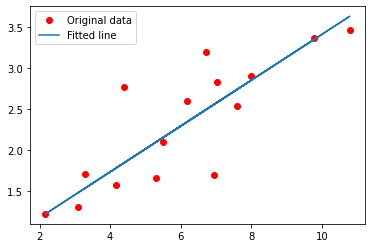

In [ ]:
print("==== 6. Plot the graph ====")
predicted = model(torch.from_numpy(x_train)).detach().numpy()
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()


In [ ]:
print("==== 7. Save the model checkpoint ====")
torch.save(model.state_dict(), 'model.ckpt')

print("==== End ====")
print("             ")

==== 7. Save the model checkpoint ====
==== End ====
             
